In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error as mse, r2_score, accuracy_score
from scipy import stats
sns.set()

def check_model_accuracy(X_train, X_test, model):
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    print(f"Mean Squared Error       : {mse(y_test, y_test_pred)}")
    print(f"R2 Score on training set : {r2_score(y_train, y_train_pred)}")
    print(f"R2 Score on Test set     : {r2_score(y_test, y_test_pred)}")
    print(f"{y_train_pred.shape}")
    print(f"{y_test_pred.shape}")
    
def show_me_the_features(columns, model):
    fim = dict(zip(columns, model.feature_importances_))
    fim = pd.DataFrame.from_dict(fim, orient='index', columns=['Importance']).sort_values(by="Importance", ascending=False)
    fim = fim[fim["Importance"] > 0]
    return fim

def create_tree_image(model):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(model, filled=True)

In [2]:
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")
y_test = pd.read_csv("../input/titanic/gender_submission.csv")




#The next few lines of code may become obsolete as I work on making the data more "Quality"
train = train.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)
train.Age.fillna(train.Age.median(), inplace=True)
test = pd.get_dummies(test, columns=['Sex', "Embarked"], drop_first=True)

test = test.drop(['Ticket', 'Cabin','Name', 'SibSp', 'Parch'], axis=1)

test.Age.fillna( test.Age.median(), inplace=True)
test.Fare.fillna( test.Fare.median(), inplace=True)
train = pd.get_dummies(train, columns=['Sex', "Embarked"], drop_first=True)


# Resume data cleaning here after quality checks.
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

passengers = test["PassengerId"]

clsf_params = {#'ccp_alpha': [0.6],
               'max_depth': [3],
               'max_features': [3],
               #'max_leaf_nodes': [3],
               #'min_impurity_decrease': [3],
               #'min_samples_leaf': [3],
               #'min_samples_split': [2],
               'min_weight_fraction_leaf': [0.0],
               'random_state': [42],
               'splitter': ["best"]
  }
clsf = tree.DecisionTreeClassifier(max_depth =3, max_features=3)
#ada = AdaBoostClassifier()
#ada_params = {
#    'algorithm': ["mighty"],
#    'base_estimator': [clsf],
#    'learning_rate': [0.1, 0.2],
#    'n_estimators': [1000, 2000], 
#    'random_state': [42]
#}

# Initialize and train the model




grid_search = GridSearchCV(estimator=clsf,
                            param_grid=clsf_params,
                            cv=4,  # Use n-fold cross-validation
                            n_jobs=-1,  # Use all available CPU cores
                            verbose=1)

clsf.fit(X_train, y_train)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model on the test set
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test)
#accuracy = accuracy_score(y_test.Survived, y_pred)
#print("Best Hyperparameters:", best_params)
#print("Accuracy on Test Set:", accuracy)

y_pred



Fitting 4 folds for each of 1 candidates, totalling 4 fits


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [3]:
#xgb_pred = xgb_model.predict(test)
#xgb_pred = xgb_pred.astype(int)

#ada_pred = ada.predict(test)
#ada_pred = ada_pred.astype(int)

#clsf_pred = clsf.predict(test)
#clsf_pred = clsf_pred.astype(int)

#rdfc_pred = rdfc.predict(test)
#rdfc_pred = rdfc_pred.astype(int)

#bag_pred = bag.predict(test)
#bag_pred = bag_pred.astype(int)

#grad_boost_pred = grad_boost.predict(test)
#grad_boost_pred = grad_boost_pred.astype(int)

In [4]:



# Any results you write to the current directory are saved as output.

#all_predictions = np.array([ada_pred, clsf_pred, rdfc_pred, bag_pred, grad_boost_pred])

# Calculate the average across columns for each row
#average_predictions = np.mean(all_predictions, axis=0).astype(int)

submission = pd.DataFrame({
    'PassengerId': passengers,
    'Survived': y_pred
})

accuracy = accuracy_score(y_test.Survived, y_pred)
print("Accuracy:", accuracy)

submission.to_csv('Grid Search DT Classifier upgrade', index=False)

Accuracy: 0.6483253588516746


In [5]:
accuracy = accuracy_score(y_test.Survived, submission.Survived)
accuracy

0.6483253588516746

In [6]:
data = pd.read_csv("../input/titanic/train.csv")

In [7]:
data["Counter"] = 1

In [8]:
z_scores = stats.zscore(data['Fare'])

# Define a threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 4

# Identify and remove outliers
outliers = data[abs(z_scores) > threshold]
df_no_outliers = data[abs(z_scores) <= threshold]

In [9]:
df_no_outliers.Fare.mean()

28.505875113636364

In [10]:
outliers.sort_values(by="Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Counter
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1


In [11]:
groop = data.groupby(by=["Sex", "Pclass"]).sum().reset_index(drop=False)
groop

,Sex,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Counter
0,female,1,44106,91,2942.00,52,43,9975.8250,94
1,female,2,33676,70,2125.50,37,46,1669.7292,76
2,female,3,57561,72,2218.50,129,115,2321.1086,144
3,male,1,55599,45,4169.42,38,34,8201.5875,122
4,male,2,48380,17,3043.33,37,24,2132.1125,108
5,male,3,158064,47,6706.42,173,78,4393.5865,347


In [12]:
groop["Average_Fare"] = groop["Fare"]/groop["Counter"]
groop["Average_Age"]  = groop["Age"]/groop["Survived"]
groop["Died"] = groop["Counter"]-groop["Survived"]
groop

,Sex,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Counter,Average_Fare,Average_Age,Died
0,female,1,44106,91,2942.00,52,43,9975.8250,94,106.125798,32.329670,3
1,female,2,33676,70,2125.50,37,46,1669.7292,76,21.970121,30.364286,6
2,female,3,57561,72,2218.50,129,115,2321.1086,144,16.118810,30.812500,72
3,male,1,55599,45,4169.42,38,34,8201.5875,122,67.226127,92.653778,77
4,male,2,48380,17,3043.33,37,24,2132.1125,108,19.741782,179.019412,91
5,male,3,158064,47,6706.42,173,78,4393.5865,347,12.661633,142.689787,300


In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Counter'],
      dtype='object')

<BarContainer object of 6 artists>

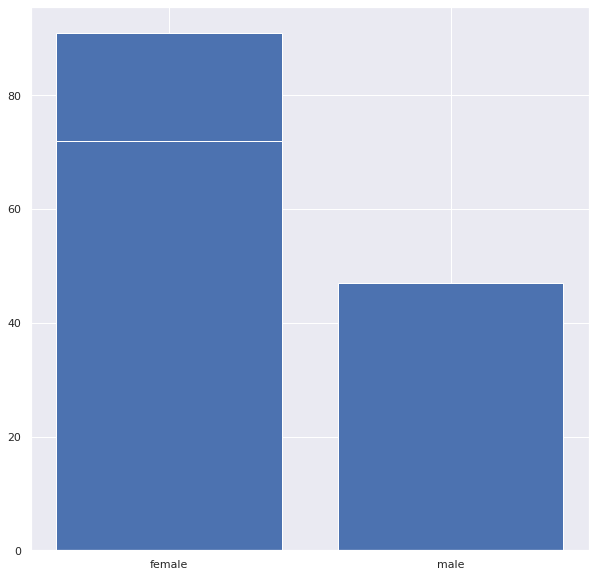

In [14]:
plt.figure(figsize=(10,10))
plt.bar(groop.Sex, groop.Survived)